## This notebook contains:
### 01. Import libraries and data
### 02. Adjust place names to match geo JSON
### 03. Create df with median district rents
### 04. Merge rent data with geodata
### 05. Create choropleth map
### 06. Create interactive map

# 01. Import libraries and data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import geodatasets

In [36]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [37]:
district_geo = gpd.read_file(r'C:\Users\jacym\Desktop\Career Foundry projects\german rent\02 data\cleaned data\3_mittel.geo.json', encoding='utf-8')

In [38]:
district_geo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,geometry
0,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,244,Oldenburg,NaN,NaN,Landkreise,Rural district,"POLYGON ((8.65348 53.11003, 8.67216 53.10675, ..."
1,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,245,Osnabrück Städte,NaN,NaN,Kreisfreie Städte,Urban district,"POLYGON ((7.96379 52.32545, 8.01185 52.34164, ..."
2,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,246,Osnabrück,NaN,NaN,Landkreise,Rural district,"POLYGON ((8.02655 52.68435, 8.08965 52.62730, ..."
3,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,247,Vechta,NaN,NaN,Landkreise,Rural district,"POLYGON ((8.46214 52.80015, 8.45059 52.78872, ..."
4,86,DEU,Germany,9,Niedersachsen,23,Weser-Ems,248,Wesermarsch,NaN,NaN,Landkreise,Rural district,"MULTIPOLYGON (((8.30750 53.61819, 8.34361 53.6..."


In [39]:
# copy to clipboard and save as csv with utf-8 encoding
district_geo.to_clipboard()

In [40]:
district_geo.dtypes

ID_0            int64
ISO            object
NAME_0         object
ID_1            int64
NAME_1         object
ID_2            int64
NAME_2         object
ID_3            int64
NAME_3         object
NL_NAME_3     float64
VARNAME_3      object
TYPE_3         object
ENGTYPE_3      object
geometry     geometry
dtype: object

In [41]:
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [42]:
# Import rent data

df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_district_pop_merged.csv'), index_col = False)
df2 = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_district_pop_merged.csv'), index_col = False)

In [43]:
df.head()

,scoutId,regio1,baseRent,totalRent,price/unit,pricetrend,livingSpace,plz,picturecount,newlyConst,...,date,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,districtPopTrend,districtPop
0,96107057,Nordrhein_Westfalen,595.0,840.00,9.767442,4.62,86.00,44269,6,False,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
1,92798563,Nordrhein_Westfalen,972.6,1320.65,15.179885,3.76,87.00,44229,12,True,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
2,114894763,Nordrhein_Westfalen,396.8,493.80,7.964516,4.10,62.00,44137,0,False,...,2020-02-01,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
3,90046012,Nordrhein_Westfalen,310.0,460.00,8.363636,3.28,55.00,44329,14,False,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
4,87928570,Nordrhein_Westfalen,301.0,NaN,NaN,4.41,30.07,44137,31,False,...,2018-09-22,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010


In [44]:
df.shape

(257607, 40)

In [45]:
df.isnull().sum()

scoutId                     0
regio1                      0
baseRent                    0
totalRent               39303
price/unit              39303
pricetrend               1708
livingSpace                70
plz                         0
picturecount                0
newlyConst                  0
yearConstructed         54395
firingTypes             54416
heatingType             42643
hasKitchen                  0
cellar                      0
condition               64656
street                      0
lift                        0
typeOfFlat              34068
noRooms                     0
floor                   49404
balcony                     0
garden                      0
baseRentRange               0
noRoomsRange                0
livingSpaceRange            0
yearConstructedRange    54395
regio2                      0
regio3                      0
description             18209
date                        0
population                  0
populationTrend             0
popTrendCa

# 02. Adjust place names to match geo JSON

This is the most intensive part of the mapping process -- making sure the geo labels match exactly. I'm making a number of changes here to make sure the rent data has the same naming convention, spelling, etc. as the geo json. 

In [46]:
df = df.replace({'regio2': {'Aachen': 'Aachen Städte', 'Amberg': 'Amberg Städte', 'Ansbach': 'Ansbach Städte', 'Aschaffenburg': 'Aschaffenburg Städte', 'Augsburg': 'Augsburg Städte', 'Baden_Baden': 'Baden-Baden Städte', 'Bamberg': 'Bamberg Städte', 'Bayreuth': 'Bayreuth Städte', 'Berlin': 'Berlin Städte', 'Bielefeld': 'Bielefeld Städte', 'Bochum': 'Bochum Städte', 'Bonn': 'Bonn Städte', 'Bottrop': 'Bottrop Städte', 'Brandenburg_an_der_Havel': 'Brandenburg an der Havel Städte', 'Braunschweig': 'Braunschweig Städte', ' Bremen': ' Bremen Städte', 'Bremerhaven': 'Bremerhaven Städte', 'Chemnitz': 'Chemnitz Städte', 'Coburg': 'Coburg Städte', 'Köln': 'Cologne Städte', 'Cottbus': 'Cottbus Städte', 'Darmstadt': 'Darmstadt Städte', 'Delmenhorst': 'Delmenhorst Städte', 'Dessau_Roßlau': 'Dessau-Roßlau Städte', 'Dortmund': 'Dortmund Städte', 'Dresden': 'Dresden Städte', 'Duisburg': 'Duisburg Städte', 'Düsseldorf': 'Düsseldorf Städte', 'Emden': 'Emden Städte', 'Erfurt': 'Erfurt Städte', 'Erlangen': 'Erlangen Städte', 'Essen': 'Essen Städte', 'Flensburg': 'Flensburg Städte', 'Frankenthal': 'Frankenthal Städte', 'Frankfurt_am_Main': 'Frankfurt am Main Städte', 'Frankfurt_Oder': 'Frankfurt am Oder Städte', 'Freiburg_im_Breisgau': 'Freiburg im Breisgau Städte', 'Fürth': 'Fürth Städte', 'Gelsenkirchen': 'Gelsenkirchen Städte', 'Gera': 'Gera Städte', 'Göttingen': 'Göttingen Städte', 'Hagen': 'Hagen Städte', 'Halle': 'Halle Städte', ' Hamburg': ' Hamburg Städte', 'Hamm': 'Hamm Städte', 'Hanover': 'Hanover Städte', 'Heidelberg': 'Heidelberg Städte', 'Heilbronn': 'Heilbronn Städte', 'Herne': 'Herne Städte', 'Hof': 'Hof Städte', 'Ingolstadt': 'Ingolstadt Städte', 'Jena': 'Jena Städte', 'Kaiserslautern': 'Kaiserslautern Städte', 'Karlsruhe': 'Karlsruhe Städte', 'Kassel': 'Kassel Städte', 'Kaufbeuren': 'Kaufbeuren Städte', 'Kempten': 'Kempten Städte', 'Kiel': 'Kiel Städte', 'Koblenz': 'Koblenz Städte', 'Krefeld': 'Krefeld Städte', 'Landau': 'Landau Städte', 'Landshut': 'Landshut Städte', 'Leipzig': 'Leipzig Städte', 'Leverkusen': 'Leverkusen Städte', 'Lübeck': 'Lübeck Städte', 'Ludwigshafen': 'Ludwigshafen Städte', 'Magdeburg': 'Magdeburg Städte', 'Mainz': 'Mainz Städte', 'Mannheim': 'Mannheim Städte', 'Memmingen': 'Memmingen Städte', 'Mönchengladbach': 'Mönchengladbach Städte', 'Mülheim_an_der_Ruhr': 'Mülheim Städte', 'München': 'Munich Städte', 'Münster': 'Münster Städte', 'Neumünster': 'Neumünster Städte', 'Neustadt_an_der_Weinstraße': 'Neustadt Städte Städte', 'Nürnberg': 'Nuremberg Städte', 'Oberhausen': 'Oberhausen Städte', 'Offenbach_am_Main': 'Offenbach am Main Städte', 'Oldenburg': 'Oldenburg Städte', 'Osnabrück': 'Osnabrück Städte', 'Passau': 'Passau Städte', 'Pforzheim': 'Pforzheim Städte', 'Pirmasens': 'Pirmasens Städte', 'Potsdam': 'Potsdam Städte', 'Regensburg': 'Regensburg Städte', 'Remscheid': 'Remscheid Städte', 'Rosenheim': 'Rosenheim Städte', 'Rostock': 'Rostock Städte', 'Salzgitter': 'Salzgitter Städte', 'Schwabach': 'Schwabach Städte', 'Schweinfurt': 'Schweinfurt Städte', 'Schwerin': 'Schwerin Städte', 'Solingen': 'Solingen Städte', 'Speyer': 'Speyer Städte', 'Straubing': 'Straubing Städte', 'Stuttgart': 'Stuttgart Städte', 'Suhl': 'Suhl Städte', 'Trier': 'Trier Städte', 'Ulm': 'Ulm Städte', 'Weiden_in_der_Oberpfalz': 'Weiden Städte', 'Weimar': 'Weimar Städte', 'Wiesbaden': 'Wiesbaden Städte', 'Wilhelmshaven': 'Wilhelmshaven Städte', 'Wolfsburg': 'Wolfsburg Städte', 'Worms': 'Worms Städte', 'Wuppertal': 'Wuppertal Städte', 'Würzburg': 'Würzburg Städte', 'Zweibrücken': 'Zweibrücken Städte'}})

In [47]:
df = df.replace({'regio2': {'Aachen_Kreis': 'Aachen', 'Ahrweiler_Kreis': 'Ahrweiler', 'Aichach_Friedberg_Kreis': 'Aichach_Friedberg', 'Alb_Donau_Kreis': 'Alb_Donau', 'Altenburger_Land_Kreis': 'Altenburger_Land', 'Altenkirchen_Westerwald_Kreis': 'Altenkirchen_Westerwald', 'Altötting_Kreis': 'Altötting', 'Alzey_Worms_Kreis': 'Alzey_Worms', 'Amberg_Sulzbach_Kreis': 'Amberg_Sulzbach', 'Ammerland_Kreis': 'Ammerland', 'Anhalt_Bitterfeld_Kreis': 'Anhalt_Bitterfeld', 'Ansbach_Kreis': 'Ansbach', 'Aschaffenburg_Kreis': 'Aschaffenburg', 'Augsburg_Kreis': 'Augsburg', 'Aurich_Kreis': 'Aurich', 'Bad_Doberan_Kreis': 'Bad_Doberan', 'Bad_Dürkheim_Kreis': 'Bad_Dürkheim', 'Bad_Kissingen_Kreis': 'Bad_Kissingen', 'Bad_Kreuznach_Kreis': 'Bad_Kreuznach', 'Bad_Tölz_Wolfratshausen_Kreis': 'Bad_Tölz_Wolfratshausen', 'Bamberg_Kreis': 'Bamberg', 'Barnim_Kreis': 'Barnim', 'Bautzen_Kreis': 'Bautzen', 'Bayreuth_Kreis': 'Bayreuth', 'Berchtesgadener_Land_Kreis': 'Berchtesgadener_Land', 'Bergstraße_Kreis': 'Bergstraße', 'Bernkastel_Wittlich_Kreis': 'Bernkastel_Wittlich', 'Biberach_Kreis': 'Biberach', 'Birkenfeld_Kreis': 'Birkenfeld', 'Bitburg_Prüm_Kreis': 'Bitburg_Prüm', 'Böblingen_Kreis': 'Böblingen', 'Börde_Kreis': 'Börde', 'Borken_Kreis': 'Borken', 'Breisgau_Hochschwarzwald_Kreis': 'Breisgau_Hochschwarzwald', 'Calw_Kreis': 'Calw', 'Celle_Kreis': 'Celle', 'Cham_Kreis': 'Cham', 'Cloppenburg_Kreis': 'Cloppenburg', 'Coburg_Kreis': 'Coburg', 'Cochem_Zell_Kreis': 'Cochem_Zell', 'Coesfeld_Kreis': 'Coesfeld', 'Cuxhaven_Kreis': 'Cuxhaven', 'Dachau_Kreis': 'Dachau', 'Dahme_Spreewald_Kreis': 'Dahme_Spreewald', 'Darmstadt_Dieburg_Kreis': 'Darmstadt_Dieburg', 'Deggendorf_Kreis': 'Deggendorf', 'Demmin_Kreis': 'Demmin', 'Diepholz_Kreis': 'Diepholz', 'Dillingen_an_der_Donau_Kreis': 'Dillingen_an_der_Donau', 'Dingolfing_Landau_Kreis': 'Dingolfing_Landau', 'Dithmarschen_Kreis': 'Dithmarschen', 'Donau_Ries_Kreis': 'Donau_Ries', 'Düren_Kreis': 'Düren', 'Ebersberg_Kreis': 'Ebersberg', 'Eichsfeld_Kreis': 'Eichsfeld', 'Eichstätt_Kreis': 'Eichstätt', 'Elbe_Elster_Kreis': 'Elbe_Elster', 'Emmendingen_Kreis': 'Emmendingen', 'Emsland_Kreis': 'Emsland', 'Ennepe_Ruhr_Kreis': 'Ennepe_Ruhr', 'Erding_Kreis': 'Erding', 'Erlangen_Höchstadt_Kreis': 'Erlangen_Höchstadt', 'Esslingen_Kreis': 'Esslingen', 'Euskirchen_Kreis': 'Euskirchen', 'Forchheim_Kreis': 'Forchheim', 'Freising_Kreis': 'Freising', 'Freudenstadt_Kreis': 'Freudenstadt', 'Freyung_Grafenau_Kreis': 'Freyung_Grafenau', 'Friesland_Kreis': 'Friesland', 'Fulda_Kreis': 'Fulda', 'Fürstenfeldbruck_Kreis': 'Fürstenfeldbruck', 'Fürth_Kreis': 'Fürth', 'Garmisch_Partenkirchen_Kreis': 'Garmisch_Partenkirchen', 'Germersheim_Kreis': 'Germersheim', 'Gießen_Kreis': 'Gießen', 'Gifhorn_Kreis': 'Gifhorn', 'Göppingen_Kreis': 'Göppingen', 'Görlitz_Kreis': 'Görlitz', 'Goslar_Kreis': 'Goslar', 'Gotha_Kreis': 'Gotha', 'Göttingen_Kreis': 'Göttingen', 'Grafschaft_Bentheim_Kreis': 'Grafschaft_Bentheim', 'Greiz_Kreis': 'Greiz', 'Groß_Gerau_Kreis': 'Groß_Gerau', 'Günzburg_Kreis': 'Günzburg', 'Güstrow_Kreis': 'Güstrow', 'Gütersloh_Kreis': 'Gütersloh', 'Hameln_Pyrmont_Kreis': 'Hameln_Pyrmont', 'Hannover_Kreis': 'Hannover', 'Harburg_Kreis': 'Harburg', 'Harz_Kreis': 'Harz', 'Haßberge_Kreis': 'Haßberge', 'Havelland_Kreis': 'Havelland', 'Heidenheim_Kreis': 'Heidenheim', 'Heilbronn_Kreis': 'Heilbronn', 'Heinsberg_Kreis': 'Heinsberg', 'Helmstedt_Kreis': 'Helmstedt', 'Herford_Kreis': 'Herford', 'Hersfeld_Rotenburg_Kreis': 'Hersfeld_Rotenburg', 'Herzogtum_Lauenburg_Kreis': 'Herzogtum_Lauenburg', 'Hildburghausen_Kreis': 'Hildburghausen', 'Hildesheim_Kreis': 'Hildesheim', 'Hof_Kreis': 'Hof', 'Holzminden_Kreis': 'Holzminden', 'Höxter_Kreis': 'Höxter', 'Ilm_Kreis': 'Ilm', 'Jerichower_Land_Kreis': 'Jerichower_Land', 'Kaiserslautern_Kreis': 'Kaiserslautern', 'Karlsruhe_Kreis': 'Karlsruhe', 'Kassel_Kreis': 'Kassel', 'Kelheim_Kreis': 'Kelheim', 'Kitzingen_Kreis': 'Kitzingen', 'Kleve_Kreis': 'Kleve', 'Konstanz_Kreis': 'Konstanz', 'Kronach_Kreis': 'Kronach', 'Kulmbach_Kreis': 'Kulmbach', 'Kusel_Kreis': 'Kusel', 'Lahn_Dill_Kreis': 'Lahn_Dill', 'Landsberg_am_Lech_Kreis': 'Landsberg_am_Lech', 'Landshut_Kreis': 'Landshut', 'Leer_Kreis': 'Leer', 'Leipzig_Kreis': 'Leipzig', 'Lichtenfels_Kreis': 'Lichtenfels', 'Limburg_Weilburg_Kreis': 'Limburg_Weilburg', 'Lindau_Bodensee_Kreis': 'Lindau_Bodensee', 'Lippe_Kreis': 'Lippe', 'Lörrach_Kreis': 'Lörrach', 'Lüchow_Dannenberg_Kreis': 'Lüchow_Dannenberg', 'Ludwigsburg_Kreis': 'Ludwigsburg', 'Ludwigslust_Kreis': 'Ludwigslust', 'Lüneburg_Kreis': 'Lüneburg', 'Main_Kinzig_Kreis': 'Main_Kinzig', 'Main_Spessart_Kreis': 'Main_Spessart', 'Main_Tauber_Kreis': 'Main_Tauber', 'Main_Taunus_Kreis': 'Main_Taunus', 'Mainz_Bingen_Kreis': 'Mainz_Bingen', 'Mansfeld_Südharz_Kreis': 'Mansfeld_Südharz', 'Marburg_Biedenkopf_Kreis': 'Marburg_Biedenkopf', 'Märkisch_Oderland_Kreis': 'Märkisch_Oderland', 'Märkischer_Kreis': 'Märkischer', 'Mayen_Koblenz_Kreis': 'Mayen_Koblenz', 'Mecklenburg_Strelitz_Kreis': 'Mecklenburg_Strelitz', 'Meißen_Kreis': 'Meißen', 'Merzig_Wadern_Kreis': 'Merzig_Wadern', 'Mettmann_Kreis': 'Mettmann', 'Miesbach_Kreis': 'Miesbach', 'Miltenberg_Kreis': 'Miltenberg', 'Minden_Lübbecke_Kreis': 'Minden_Lübbecke', 'Mittelsachsen_Kreis': 'Mittelsachsen', 'Mühldorf_am_Inn_Kreis': 'Mühldorf_am_Inn', 'München_Kreis': 'München', 'Müritz_Kreis': 'Müritz', 'Neckar_Odenwald_Kreis': 'Neckar_Odenwald', 'Neu_Ulm_Kreis': 'Neu_Ulm', 'Neuburg_Schrobenhausen_Kreis': 'Neuburg_Schrobenhausen', 'Neumarkt_in_der_Oberpfalz_Kreis': 'Neumarkt_in_der_Oberpfalz', 'Neunkirchen_Kreis': 'Neunkirchen', 'Neuss_Rhein_Kreis': 'Neuss_Rhein', 'Neustadt_a.d._Aisch_Bad_Windsheim_Kreis': 'Neustadt_a.d._Aisch_Bad_Windsheim', 'Neustadt_a.d._Waldnaab_Kreis': 'Neustadt_a.d._Waldnaab', 'Neuwied_Kreis': 'Neuwied', 'Nienburg_Weser_Kreis': 'Nienburg_Weser', 'Nordfriesland_Kreis': 'Nordfriesland', 'Nordhausen_Kreis': 'Nordhausen', 'Nordsachsen_Kreis': 'Nordsachsen', 'Nordvorpommern_Kreis': 'Nordvorpommern', 'Nordwestmecklenburg_Kreis': 'Nordwestmecklenburg', 'Northeim_Kreis': 'Northeim', 'Nürnberger_Land_Kreis': 'Nürnberger_Land', 'Oberallgäu_Kreis': 'Oberallgäu', 'Oberbergischer_Kreis': 'Oberbergischer', 'Oberhavel_Kreis': 'Oberhavel', 'Oberspreewald_Lausitz_Kreis': 'Oberspreewald_Lausitz', 'Oder_Spree_Kreis': 'Oder_Spree', 'Offenbach_Kreis': 'Offenbach', 'Oldenburg_Kreis': 'Oldenburg', 'Olpe_Kreis': 'Olpe', 'Osnabrück_Kreis': 'Osnabrück', 'Ostallgäu_Kreis': 'Ostallgäu', 'Osterholz_Kreis': 'Osterholz', 'Osterode_am_Harz_Kreis': 'Osterode_am_Harz', 'Ostholstein_Kreis': 'Ostholstein', 'Ostprignitz_Ruppin_Kreis': 'Ostprignitz_Ruppin', 'Ostvorpommern_Kreis': 'Ostvorpommern', 'Paderborn_Kreis': 'Paderborn', 'Parchim_Kreis': 'Parchim', 'Passau_Kreis': 'Passau', 'Peine_Kreis': 'Peine', 'Pfaffenhofen_an_der_Ilm_Kreis': 'Pfaffenhofen_an_der_Ilm', 'Pinneberg_Kreis': 'Pinneberg', 'Plön_Kreis': 'Plön', 'Potsdam_Mittelmark_Kreis': 'Potsdam_Mittelmark', 'Prignitz_Kreis': 'Prignitz', 'Rastatt_Kreis': 'Rastatt', 'Ravensburg_Kreis': 'Ravensburg', 'Recklinghausen_Kreis': 'Recklinghausen', 'Regen_Kreis': 'Regen', 'Regensburg_Kreis': 'Regensburg', 'Rems_Murr_Kreis': 'Rems_Murr', 'Rendsburg_Eckernförde_Kreis': 'Rendsburg_Eckernförde', 'Reutlingen_Kreis': 'Reutlingen', 'Rhein_Erft_Kreis': 'Rhein_Erft', 'Rhein_Hunsrück_Kreis': 'Rhein_Hunsrück', 'Rhein_Lahn_Kreis': 'Rhein_Lahn', 'Rhein_Neckar_Kreis': 'Rhein_Neckar', 'Rhein_Pfalz_Kreis': 'Rhein_Pfalz', 'Rhein_Sieg_Kreis': 'Rhein_Sieg', 'Rheingau_Taunus_Kreis': 'Rheingau_Taunus', 'Rheinisch_Bergischer_Kreis': 'Rheinisch_Bergischer', 'Rhön_Grabfeld_Kreis': 'Rhön_Grabfeld', 'Rosenheim_Kreis': 'Rosenheim', 'Rotenburg_Wümme_Kreis': 'Rotenburg_Wümme', 'Roth_Kreis': 'Roth', 'Rottal_Inn_Kreis': 'Rottal_Inn', 'Rottweil_Kreis': 'Rottweil', 'Rügen_Kreis': 'Rügen', 'Saale_Holzland_Kreis': 'Saale_Holzland', 'Saale_Orla_Kreis': 'Saale_Orla', 'Saalfeld_Rudolstadt_Kreis': 'Saalfeld_Rudolstadt', 'Saarlouis_Kreis': 'Saarlouis', 'Saarpfalz_Kreis': 'Saarpfalz', 'Sächsische_Schweiz_Osterzgebirge_Kreis': 'Sächsische_Schweiz_Osterzgebirge', 'Sankt_Wendel_Kreis': 'Sankt_Wendel', 'Schaumburg_Kreis': 'Schaumburg', 'Schleswig_Flensburg_Kreis': 'Schleswig_Flensburg', 'Schmalkalden_Meiningen_Kreis': 'Schmalkalden_Meiningen', 'Schwäbisch_Hall_Kreis': 'Schwäbisch_Hall', 'Schwalm_Eder_Kreis': 'Schwalm_Eder', 'Schwandorf_Kreis': 'Schwandorf', 'Schwarzwald_Baar_Kreis': 'Schwarzwald_Baar', 'Schweinfurt_Kreis': 'Schweinfurt', 'Segeberg_Kreis': 'Segeberg', 'Siegen_Wittgenstein_Kreis': 'Siegen_Wittgenstein', 'Sigmaringen_Kreis': 'Sigmaringen', 'Soest_Kreis': 'Soest', 'Soltau_Fallingbostel_Kreis': 'Soltau_Fallingbostel', 'Sömmerda_Kreis': 'Sömmerda', 'Sonneberg_Kreis': 'Sonneberg', 'Spree_Neiße_Kreis': 'Spree_Neiße', 'Stade_Kreis': 'Stade', 'Stadtverband_Saarbrücken_Kreis': 'Stadtverband_Saarbrücken', 'Starnberg_Kreis': 'Starnberg', 'Steinburg_Kreis': 'Steinburg', 'Steinfurt_Kreis': 'Steinfurt', 'Stendal_Kreis': 'Stendal', 'Stormarn_Kreis': 'Stormarn', 'Straubing_Bogen_Kreis': 'Straubing_Bogen', 'Südliche_Weinstraße_Kreis': 'Südliche_Weinstraße', 'Südwestpfalz_Kreis': 'Südwestpfalz', 'Teltow_Fläming_Kreis': 'Teltow_Fläming', 'Tirschenreuth_Kreis': 'Tirschenreuth', 'Traunstein_Kreis': 'Traunstein', 'Trier_Saarburg_Kreis': 'Trier_Saarburg', 'Tübingen_Kreis': 'Tübingen', 'Tuttlingen_Kreis': 'Tuttlingen', 'Uckermark_Kreis': 'Uckermark', 'Uecker_Randow_Kreis': 'Uecker_Randow', 'Uelzen_Kreis': 'Uelzen', 'Unna_Kreis': 'Unna', 'Unstrut_Hainich_Kreis': 'Unstrut_Hainich', 'Unterallgäu_Kreis': 'Unterallgäu', 'Vechta_Kreis': 'Vechta', 'Verden_Kreis': 'Verden', 'Viersen_Kreis': 'Viersen', 'Vulkaneifel_Kreis': 'Vulkaneifel', 'Waldeck_Frankenberg_Kreis': 'Waldeck_Frankenberg', 'Waldshut_Kreis': 'Waldshut', 'Warendorf_Kreis': 'Warendorf', 'Weilheim_Schongau_Kreis': 'Weilheim_Schongau', 'Weimarer_Land_Kreis': 'Weimarer_Land', 'Weißenburg_Gunzenhausen_Kreis': 'Weißenburg_Gunzenhausen', 'Werra_Meißner_Kreis': 'Werra_Meißner', 'Wesel_Kreis': 'Wesel', 'Wesermarsch_Kreis': 'Wesermarsch', 'Wittenberg_Kreis': 'Wittenberg', 'Wittmund_Kreis': 'Wittmund', 'Wolfenbüttel_Kreis': 'Wolfenbüttel', 'Wunsiedel_im_Fichtelgebirge_Kreis': 'Wunsiedel_im_Fichtelgebirge', 'Würzburg_Kreis': 'Würzburg', 'Zwickau_Kreis': 'Zwickau'}})

In [48]:
# change underscores to dashes
df = df.replace('_', '-', regex=True)

In [49]:
# convert dashes to two words in some cases
df = df.replace({'regio2': {'Altenburger-Land': 'Altenburger Land', 'Altenkirchen-Westerwald': 'Altenkirchen', 'Bad-Doberan': 'Bad Doberan', 'Bad-Dürkheim': 'Bad Dürkheim', 'Bad-Kissingen': 'Bad Kissingen', 'Bad-Kreuznach': 'Bad Kreuznach', 'Bad-Tölz-Wolfratshausen': 'Bad Tölz-Wolfratshausen', 'Berchtesgadener-Land': 'Berchtesgadener Land', 'Dillingen-an-der-Donau': 'Dillingen', 'Jerichower-Land': 'Jerichower Land', 'Landsberg-am-Lech': 'Landsberg', 'Mühldorf-am-Inn': 'Mühldorf', 'Neumarkt-in-der-Oberpfalz': 'Neumarkt', 'Neustadt-a.d.-Aisch-Bad-Windsheim': 'Neustadt-Bad Windsheim', 'Neustadt-a.d.-Waldnaab': 'Neustadt', 'Nürnberger-Land': 'Nürnberger Land', 'Osterode-am-Harz': 'Osterode', 'Pfaffenhofen-an-der-Ilm': 'Pfaffenhofen', 'Wunsiedel-im-Fichtelgebirge': 'Wunsiedel'}})

In [50]:
# convert remaining names
df = df.replace({'regio2': {'Altmarkkreis-Salzwedel': 'Altmarkkreis Salzwedel', 'Anhalt-Bitterfeld': 'Anhalt-Zerbst', 'Berlin Städte': 'Berlin', 'Bodenseekreis': 'Bodensee', 'Börde': 'Bördekreis', 'Bremen': 'Bremen Städte', 'Dessau-Roßlau Städte': 'Dessau Städte', 'Freiburg im Breisgau Städte': 'Freiburg', 'Görlitz': 'Görlitz Städte', 'Grafschaft-Bentheim': 'Grafschaft Bentheim', 'Halle-Saale': 'Halle Städte', 'Hamburg': 'Hamburg Städte', 'Hameln-Pyrmont': 'Hamelin-Pyrmont', 'Hannover': 'Hanover', 'Harz': 'Halberstadt', 'Heilbronn': 'Heilbronn', 'Heilbronn Städte': 'Heilbronn city Städte', 'Herzogtum-Lauenburg': 'Lauenburg', 'Hohenlohekreis': 'Hohenlohe', 'Ilm': 'Ilm-Kreis', 'Koblenz Städte': 'Koblenz Coblenz Städte', 'Lahn-Dill': 'Lahn-Dill-Kreis', 'Landau-in-der-Pfalz': 'Landau Städte', 'Leipzig': 'Leipziger Land', 'Ludwigshafen-am-Rhein': 'Ludwigshafen Städte', 'Main-Kinzig': 'Main-Kinzig-Kreis', 'Main-Taunus': 'Main-Taunus-Kreis Städte', 'Märkischer': 'Märkischer Kreis', 'Mittelsachsen': 'Freiberg', 'Neckar-Odenwald': 'Neckar-Odenwald-Kreis', 'Neuss-Rhein': 'Rhein-Kreis Neuss', 'Neustadt Städte Städte': 'Neustadt Städte', 'Nienburg-Weser': 'Nienburg', 'Nordsachsen': 'Torgau-Oschatz', 'Oberbergischer': 'Oberbergischer Kreis', 'Oldenburg-Oldenburg': 'Oldenburg Städte', 'Rems-Murr': 'Rems-Murr-Kreis', 'Rhein-Erft': 'Rhein-Erft-Kreis', 'Rheingau-Taunus': 'Rheingau-Taunus-Kreis', 'Rheinisch-Bergischer': 'Rheinisch-Bergischer Kreis', 'Rhein-Neckar': 'Rhein-Neckar-Kreis', 'Rhein-Pfalz': 'Rhein-Pfalz-Kreis', 'Rotenburg-Wümme': 'Rotenburg', 'Sächsische-Schweiz-Osterzgebirge': 'Sächsische Schweiz', 'Schwäbisch-Hall': 'Schwäbisch Hall', 'Schwalm-Eder': 'Schwalm-Eder-Kreis', 'Schwarzwald-Baar': 'Schwarzwald-Baar-Kreis', 'Südliche-Weinstraße': 'Südliche Weinstraße', 'Weimarer-Land': 'Weimarer Land', 'Werra-Meißner': 'Werra-Meißner-Kreis', 'Zwickau': 'Zwickau Städte'}})


In [51]:
df = df.replace({'regio2': {'Saalekreis': 'Merseburg-Querfurt', 'Lindau-Bodensee': 'Lindau', 'Kleve': 'Cleves', 'Kempten-Allgäu': 'Kempten Städte', 'Frankenthal-Pfalz': 'Frankenthal Städte',
                            'Sankt-Wendel': 'Sankt Wendel', 'Speyer Städte': 'Speyer Spires Städte', 'Plauen': 'Plauen Städte'}})

In [52]:
# export data with updated district names for mapping purposes
df.to_csv(r'C:\Users\jacym\Desktop\Career Foundry projects\german rent\02 Data\cleaned data\rent_districts_mapping.csv', encoding = 'utf8', index=False)

# 03. Create df with median district rents

To make the most accurate map, create a new dataset with only the median rent for each district.

In [53]:
df.groupby('regio2').agg({'totalRent':['median']})

,totalRent
,median
regio2,
Aachen,701.95
Aachen Städte,750.00
Ahrweiler,760.00
Aichach-Friedberg,997.50
Alb-Donau,895.00
...,...
Würzburg,850.00
Würzburg Städte,890.00


In [54]:
med_district_rents = df.groupby('regio2').agg({'totalRent':['median']})

In [55]:
med_district_rents2 = df2.groupby('regio2').agg({'totalRent':['median']})

In [56]:
# copy to clipboard, paste in Excel
med_district_rents.to_clipboard()

In [57]:
med_district_rents2.to_clipboard()

### Dealing with discrepancies from district boundary changes
#### I had to impute median rents for 47 additional districts because the geoJSON file doesn't reflect a number of recent reforms in district names and boundaries (primarily in Mecklenburg-Vorpommern, Sachsen and Sachsen-Anhalt). These areas would show up as missing in the map, so I imputed the median rent for the district that currently occupies the missing area or, if unavailable, I imputed the median for a neighboring district of similar character.
### Additions:
#### Annaberg	430
#### Aschersleben-Staßfurt	436
#### Aue-Schwarzenberg	430
#### Bad Doberan	470
#### Bernburg	436
#### Böblingen	700
#### Chemnitzer Land	427
#### Delitzsch	458
#### Demmin	470
#### Döbeln	410
#### Enz	883
#### Göppingen	834
#### Greifswald Städte	538
#### Kamenz	448
#### Köthen	464
#### Löbau-Zittau	415
#### Ludwigslust	499
#### Mansfelder Land	450
#### Mecklenburg-Strelitz	470
#### Mittlerer Erzgebirgskreis	430
#### Mittweida	410
#### Muldentalkreis	445
#### Müritz	470
#### Neubrandenburg Städte	470
#### Niederschlesischer Oberlausitzkreis	415
#### Nordvorpommern	470
#### Ohrekreis	473
#### Osterode	696
#### Ostvorpommern	470
#### Plauen Städte	410
#### Quedlinburg	438
#### Rhein-Kreis Neuss	682
#### Riesa-Großenhain	445
#### Saalkreis	472
#### Saarbrücken Städte	750
#### Sangerhausen	450
#### Schönebeck	436
#### Soltau-Fallingbostel	630
#### Stollberg	430
#### Stralsund Städte	517
#### Uecker-Randow	538
#### Zwickauer Land	427
#### Weißenfels	436
#### Güstrow	588
#### Bitterfeld	464
#### Weißeritzkreis	476
#### Wernigerode	438

With the above additions, I saved the sheet as a CSV with UTF-8 encoding.

# 04. Merge rent data with geodata

In [58]:
#import csv
med_rents = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'med_district_rents.csv'), index_col = False)

In [59]:
#import csv
med_rents2 = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'med_district_rents2.csv'), index_col = False)

In [60]:
med_rents.head()

,regio2,median rent
0,Aachen,702
1,Aachen Städte,750
2,Ahrweiler,760
3,Aichach-Friedberg,998
4,Alb-Donau,895


In [61]:
med_rents.shape

(446, 2)

In [62]:
# rename state column so it matches with merge column in the rent data
med_rents = med_rents.rename(columns={'regio2': 'NAME_3'})

In [63]:
# rename state column so it matches with merge column in the rent data
med_rents2 = med_rents2.rename(columns={'regio2': 'NAME_3'})

In [64]:
med_rents.head()

,NAME_3,median rent
0,Aachen,702
1,Aachen Städte,750
2,Ahrweiler,760
3,Aichach-Friedberg,998
4,Alb-Donau,895


In [65]:
# merge with geodata
district_merge = med_rents.merge(district_geo, on = 'NAME_3', indicator = True)

In [66]:
district2_merge = med_rents2.merge(district_geo, on = 'NAME_3', indicator = True)

In [67]:
# the column I want to map should be a number
district_merge.dtypes

NAME_3           object
median rent       int64
ID_0              int64
ISO              object
NAME_0           object
ID_1              int64
NAME_1           object
ID_2              int64
NAME_2           object
ID_3              int64
NL_NAME_3       float64
VARNAME_3        object
TYPE_3           object
ENGTYPE_3        object
geometry       geometry
_merge         category
dtype: object

In [68]:
district_merge.head()

,NAME_3,median rent,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,geometry,_merge
0,Aachen,702,86,DEU,Germany,10,Nordrhein-Westfalen,27,Köln,286,NaN,NaN,Landkreise,Rural district,"POLYGON ((6.07774 50.90678, 6.08340 50.91430, ...",both
1,Aachen Städte,750,86,DEU,Germany,10,Nordrhein-Westfalen,27,Köln,285,NaN,NaN,Kreisfreie Städte,Urban district,"POLYGON ((6.02499 50.84669, 6.05044 50.85033, ...",both
2,Ahrweiler,760,86,DEU,Germany,11,Rheinland-Pfalz,29,Koblenz,305,NaN,NaN,Landkreise,Rural district,"POLYGON ((7.21680 50.64571, 7.21612 50.58609, ...",both
3,Aichach-Friedberg,998,86,DEU,Germany,2,Bayern,10,Schwaben,115,NaN,NaN,Landkreise,Rural district,"POLYGON ((11.03159 48.61899, 11.05935 48.59654...",both
4,Alb-Donau,895,86,DEU,Germany,1,Baden-Württemberg,4,Tübingen,36,NaN,NaN,Landkreise,Rural district,"MULTIPOLYGON (((9.58700 48.53665, 9.62068 48.5...",both


In [69]:
# check merge flag
district_merge['_merge'].value_counts()

both          435
left_only       0
right_only      0
Name: _merge, dtype: int64

In [70]:
# need to convert the merged data to a geo dataframe, otherwise you'll get a line graph instead of a map when you try to plot
map_data = gpd.GeoDataFrame(district_merge)

In [71]:
# need to convert the merged data to a geo dataframe, otherwise you'll get a line graph instead of a map when you try to plot
map_data2 = gpd.GeoDataFrame(district2_merge)

In [72]:
map_data.columns

Index(['NAME_3', 'median rent', 'ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1',
       'ID_2', 'NAME_2', 'ID_3', 'NL_NAME_3', 'VARNAME_3', 'TYPE_3',
       'ENGTYPE_3', 'geometry', '_merge'],
      dtype='object')

In [73]:
# drop all the columns you don't want to show up in the interactive map
map_data = map_data.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1',
       'ID_2', 'NAME_2', 'ID_3', 'NL_NAME_3', 'VARNAME_3', 'TYPE_3',
       'ENGTYPE_3', '_merge'])

In [74]:
# drop all the columns you don't want to show up in the interactive map
map_data2 = map_data2.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1',
       'ID_2', 'NAME_2', 'ID_3', 'NL_NAME_3', 'VARNAME_3', 'TYPE_3',
       'ENGTYPE_3', '_merge'])

In [75]:
map_data = map_data.rename(columns={'NAME_3':'district'})

In [76]:
map_data2 = map_data2.rename(columns={'NAME_3':'district'})

# 05. Create choropleth map

Text(0.5, 1.0, 'Median rent by district')

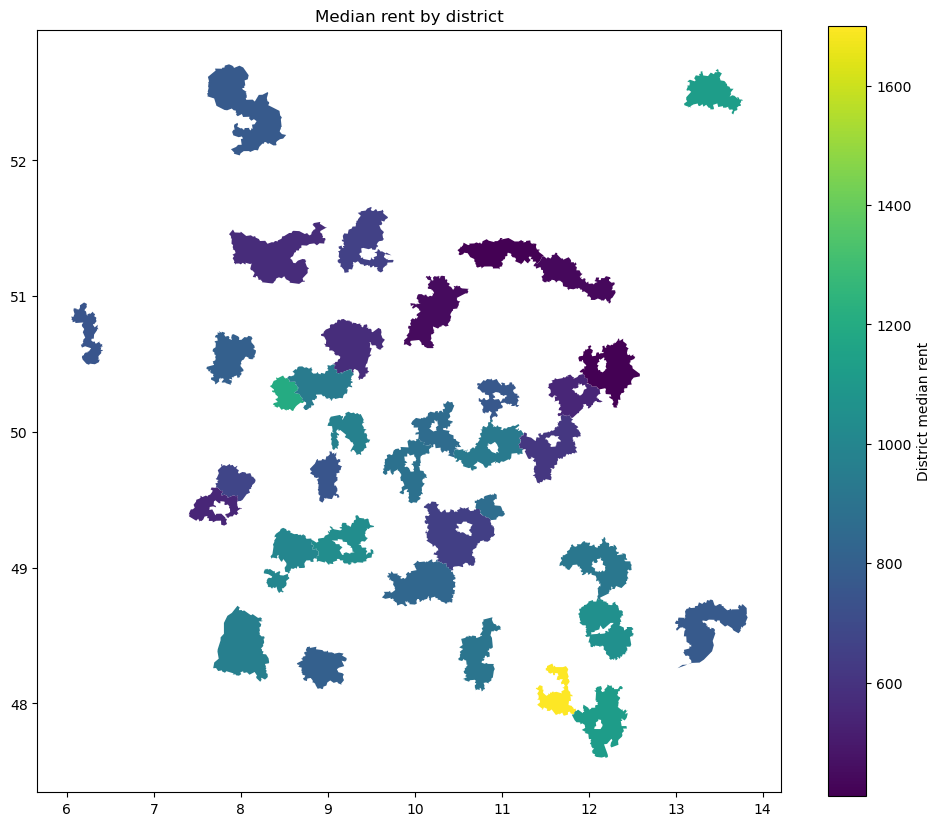

In [77]:
import mapclassify 
fig, ax = plt.subplots(figsize=(12, 10))

map_data2.plot(column='median rent', 
         legend=True, legend_kwds={"label": "District median rent", "orientation": "vertical"},
        ax=ax)
plt.title("Median rent by district")

Text(0.5, 1.0, 'Median rent by district')

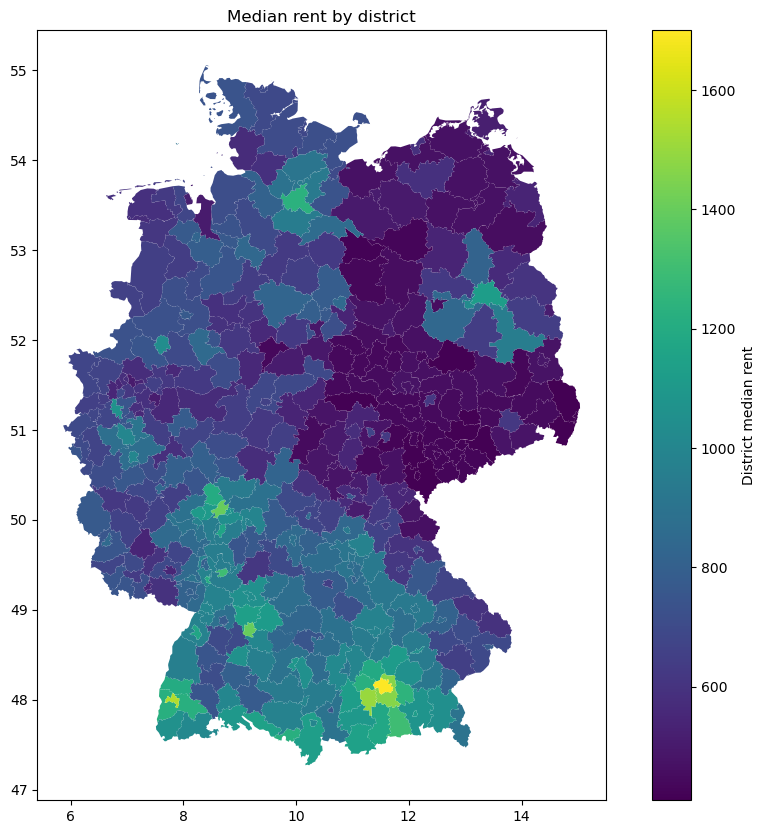

In [78]:
import mapclassify 
fig, ax = plt.subplots(figsize=(12, 10))

map_data.plot(column='median rent', 
         legend=True, legend_kwds={"label": "District median rent", "orientation": "vertical"},
        ax=ax)
plt.title("Median rent by district")

The choropleth shows that rent is generally highest in Bavaria and lowest in East Germany. Berlin and Hamburg also have some of the highest rents -- see the interactive map below for more detail. You can also see a general pattern where the highest rents are concentrated in urban districts, surrounded by relatively lower rents that continue to decrease as you move further out from the cities.
Note: District boundaries don't reflect districts that have been dissolved or merged since approximately 2007. I used the most current district shapefile I could track down.

# 06. Create interactive map

In [160]:
map_data.explore(column = "median rent", legend=True)